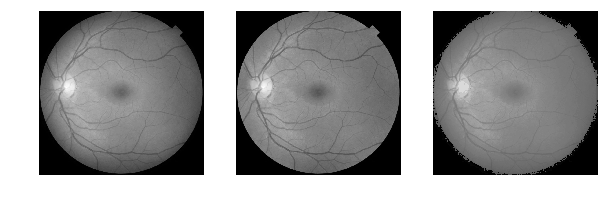

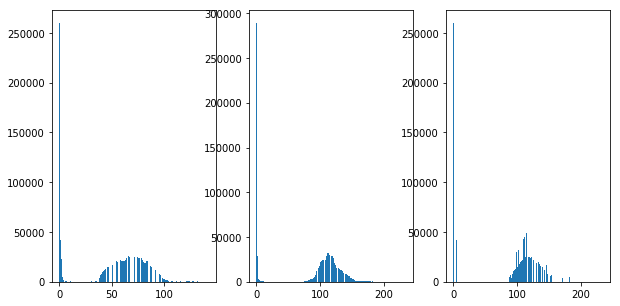

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2
def histMatching(img1, img2):
    img1 = np.array(img1)
    img2 = np.array(img2)
    img1_flat = img1.flatten()
    img2_flat = img2.flatten()

    histogram1 = np.zeros(256)
    for pixel in img1_flat:
        histogram1[pixel] += 1
    for i in range(1,256):
    #     print(i)
        histogram1[i] += histogram1[i-1]
    # histogram1 = histogram1.astype('uint8')
    histogram1 = (((histogram1-np.min(histogram1))/(np.max(histogram1)-np.min(histogram1))) *255).astype('uint8') 
    img1_new = histogram1[img1_flat]
    # img_new = np.reshape(img1_new, img1.shape)


    histogram2 = np.zeros(256)
    for pixel in img2_flat:
        histogram2[pixel] += 1
    for i in range(1,256):
    #     print(i)
        histogram2[i] += histogram2[i-1]
    histogram2 = (((histogram2-np.min(histogram2))/(np.max(histogram2)-np.min(histogram2))) *255).astype('uint8') 
    # histogram2 = histogram2.astype('uint8')
    img2_new = histogram2[img2_flat]
    # img2_new = np.reshape(img2_new, img2.shape)

    # new_img = img1
    mapping = np.zeros(256)
    new_img = img1
    for i in range(256):
        for j in range(256):
            if histogram2[j] >= histogram1[i]:
                mapping[i] = j
                break;
    #     [img2_new == img1_new[i]]
    new_img = mapping[img1].astype('uint8')
    result = Image.fromarray(new_img)
#     result.save('out.jpg')
    # new_img = new_img.astype('uint8')

    #     dif = abs(histogram1[i] - histogram2[i])
    #     dif = abs(img1_new[i] - img2_new[i])
    #     ind = np.argmin(dif)
    #     new_img[new_img == i] = ind
    # new_img = new_img.astype('uint8')
    # plt.imshow(new_img, cmap='gray');plt.axis('off')
    fig = plt.figure(figsize=[10,7]);
    sub1 = fig.add_subplot(1,3,1);
    sub1.imshow(img1, cmap='gray');sub1.axis('off')
    sub2 = fig.add_subplot(1,3,2)
    sub2.imshow(img2, cmap='gray');sub2.axis('off')
    sub3 = fig.add_subplot(1,3,3)
    sub3.imshow(new_img, cmap='gray');sub3.axis('off')

    fig = plt.figure(figsize=[10,5]);
    sub1 = fig.add_subplot(1,3,1);
    sub1.hist(img1.flatten(),bins=256)
    sub2 = fig.add_subplot(1,3,2)
    sub2.hist(img2.flatten(),bins=256)
    sub3 = fig.add_subplot(1,3,3)
    sub3.hist(new_img.flatten(), bins=256)

    return result
img1 = Image.open('../input/eye.png').convert('L')
img2 = Image.open('../input/eyeref.png').convert('L')
new_img = histMatching(img1, img2)
plt.show()